# HoloViews examples

## Following the tutorial

First, let's import HoloViews, and make sure we can use it inline in this notebook.

In [21]:
import holoviews as hv
import numpy as np
%load_ext holoviews.ipython

The holoviews.ipython extension is already loaded. To reload it, use:
  %reload_ext holoviews.ipython


Define a sine function with frequency $f$ and phase $\phi$:

In [2]:
def sine(x, phase=0.0, freq=100.0):
    return np.sin(freq*x + phase)

Define arrays of phases and frequencies to explore.

In [5]:
phases = np.linspace(0.0, 2*np.pi, num=11)
freqs  = np.linspace(50.0, 150.0, 5)

Sample the function in 2D over a grid.

In [6]:
dist = np.linspace(-0.5, 0.5, 202)
x, y = np.meshgrid(dist, dist)
grid = x**2 + y**2

Now create a HoloViews object out of data.

In [7]:
freq1 = hv.Image(sine(grid, freq=50))

Visualize the object.

:Image   [x,y]   (z)
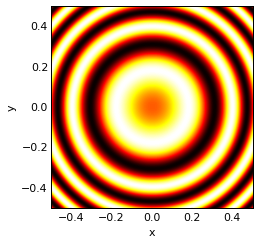

In [8]:
freq1

Also show the curve of sine as a function of the distance.

:Layout
   .Image.I :Image   [x,y]   (z)
   .Curve.I :Curve   [$r$]   (amplitude)
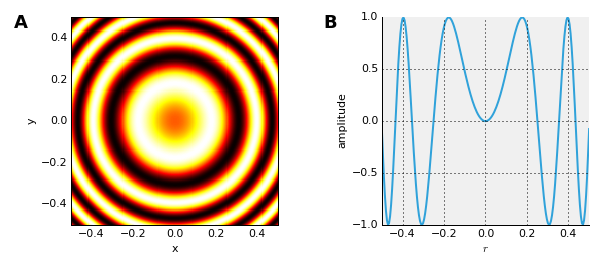

In [9]:
freq1 + hv.Curve(zip(dist, sine(dist**2, freq=50)), kdims=['$r$'], vdims=['amplitude'])

Define dimensions and keys for high-dimensional HoloView.

In [10]:
dimensions = ['$\phi$', '$f$']
keys = [(p, f) for p in phases for f in freqs]

In [11]:
items = [(k, hv.Image(sine(grid, *k), vdims=['amplitude'])) for k in keys]

:HoloMap   [$\phi$,$f$]
   :Image   [x,y]   (amplitude)
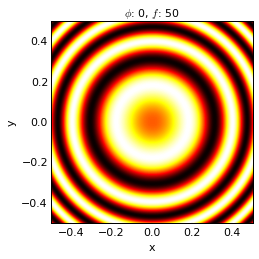
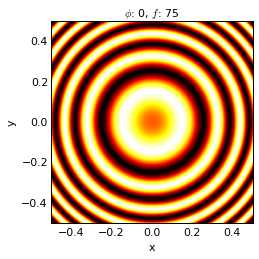
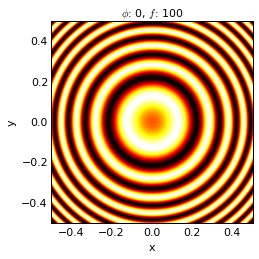
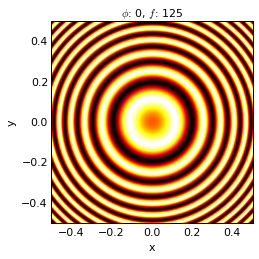
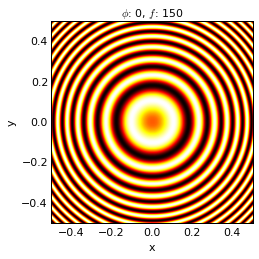
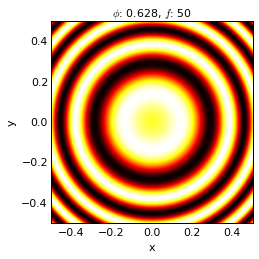
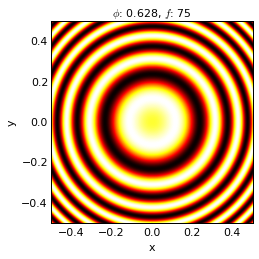
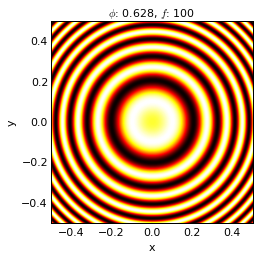
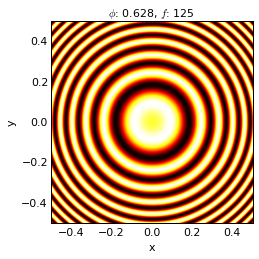
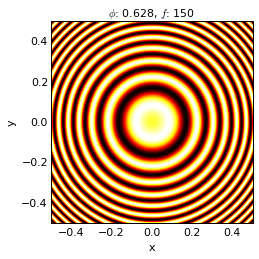
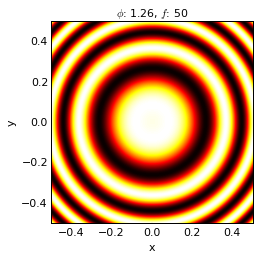
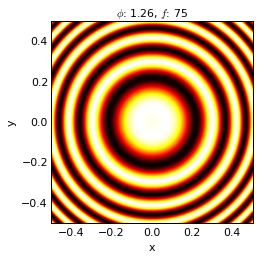
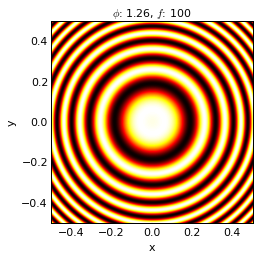
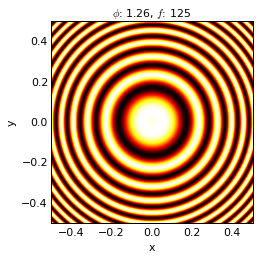
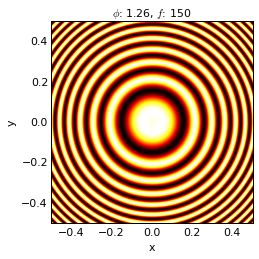
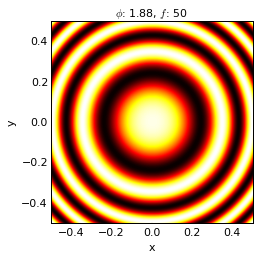
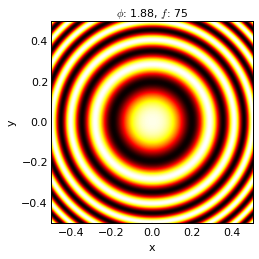
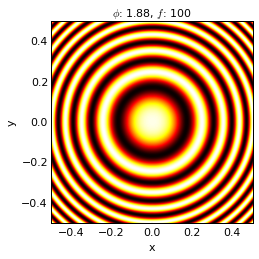
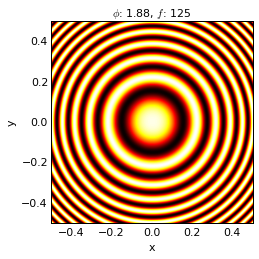
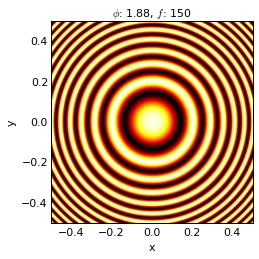
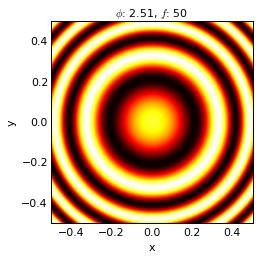
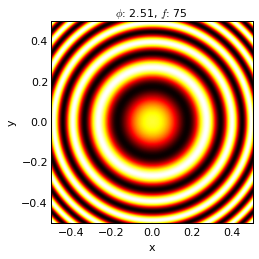
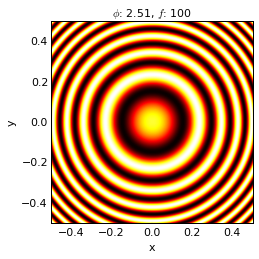
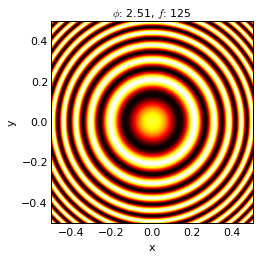
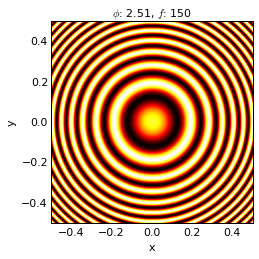
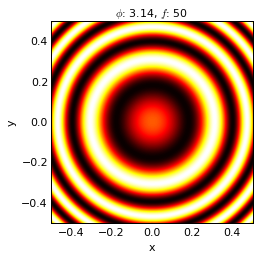
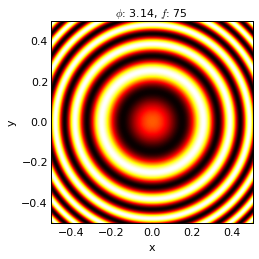
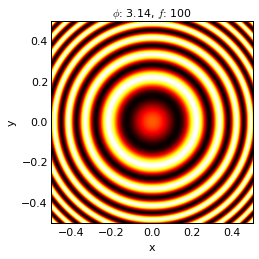
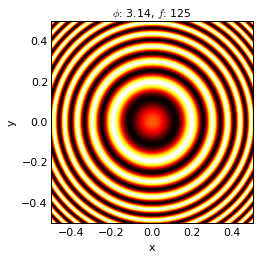
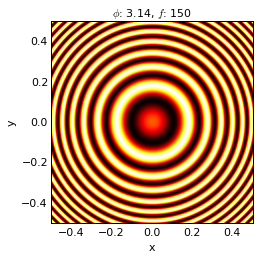
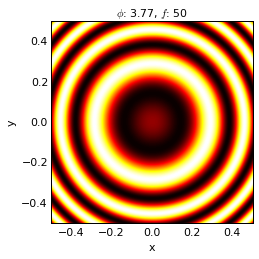
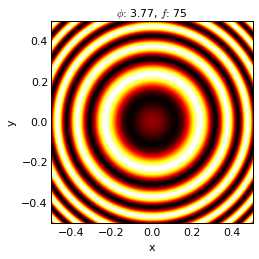
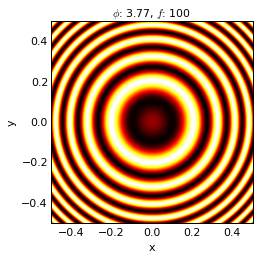
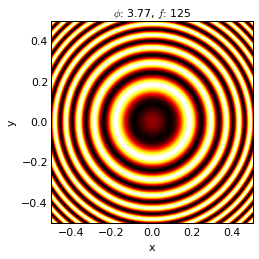
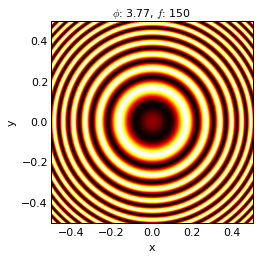
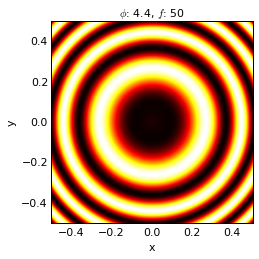
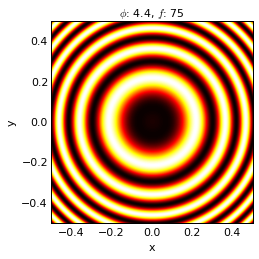
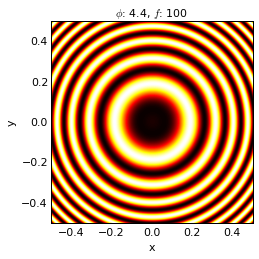
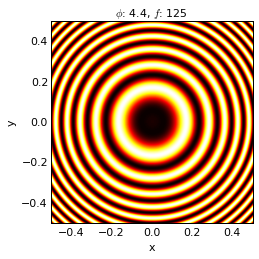
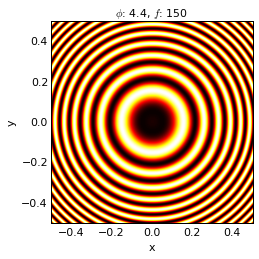
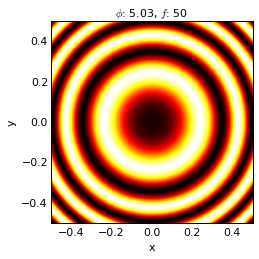
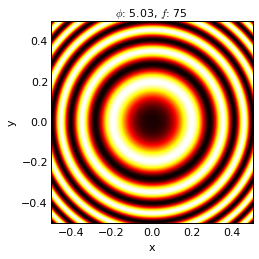
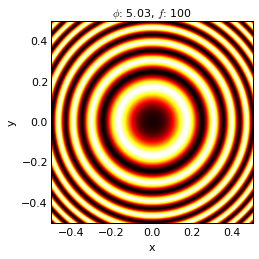
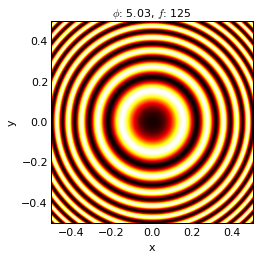
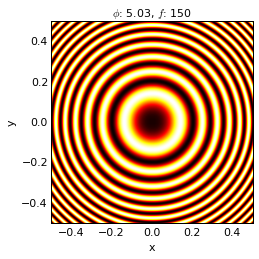
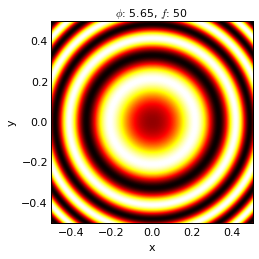
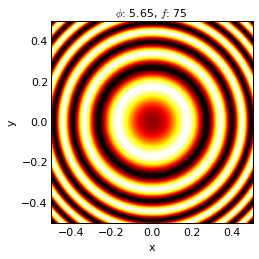
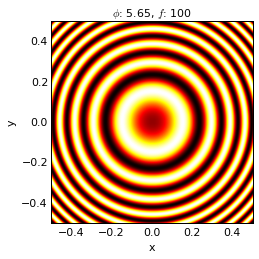
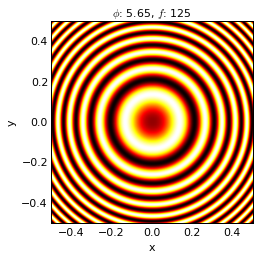
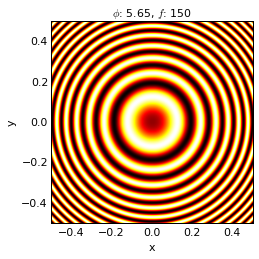
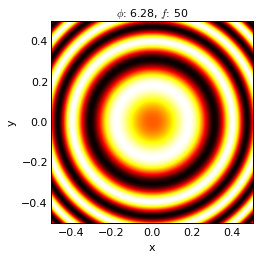
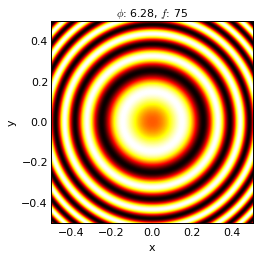
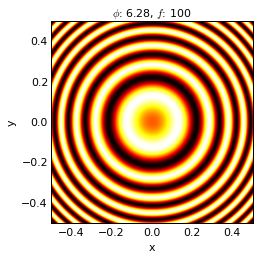
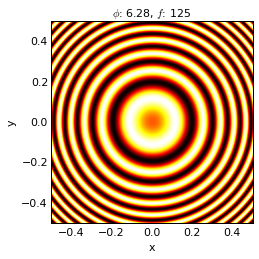
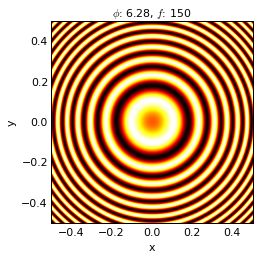

In [12]:
circular_wave = hv.HoloMap(items, kdims=dimensions)
circular_wave

## Some overlays

Define two functions f and g.

In [6]:
def f(x):
    return np.cos(x)*np.exp(-0.1*x)
def g(x):
    return np.sin(x)*np.exp(-0.1*x)

Create x-range.

In [7]:
x = np.linspace(0.0, 50.0, 1001)

Compute the curves for functions f and g.

In [18]:
f_curve = hv.Curve((x, f(x)), label='$e^{-0.1x} \cos x$')
g_curve = hv.Curve((x, g(x)), label='$e^{-0.1x} \sin x$')

Show the curves side by side.

:Layout
   .Curve.E_power_left_curly_bracket_hyphen_minus_0_full_stop_1x_right_curly_bracket_reverse_over_cos_x :Curve   [x]   (y)
   .Curve.E_power_left_curly_bracket_hyphen_minus_0_full_stop_1x_right_curly_bracket_reverse_over_sin_x :Curve   [x]   (y)
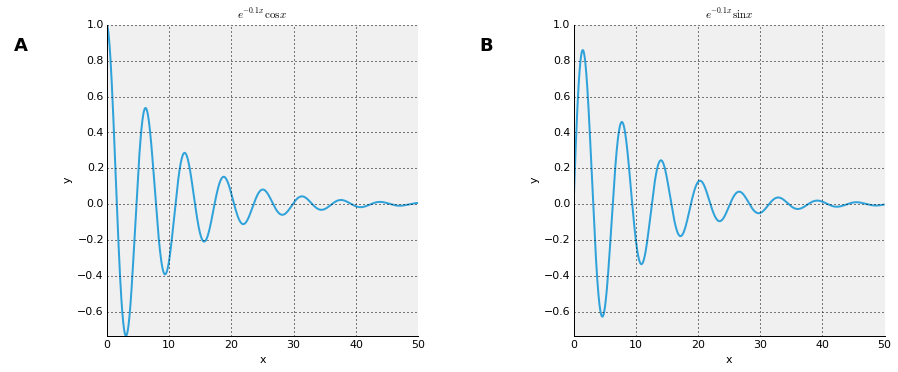

In [23]:
%%output size=150
f_curve + g_curve

Show the curves superimposed.

:Overlay
   .Curve.E_power_left_curly_bracket_hyphen_minus_0_full_stop_1x_right_curly_bracket_reverse_over_cos_x :Curve   [x]   (y)
   .Curve.E_power_left_curly_bracket_hyphen_minus_0_full_stop_1x_right_curly_bracket_reverse_over_sin_x :Curve   [x]   (y)
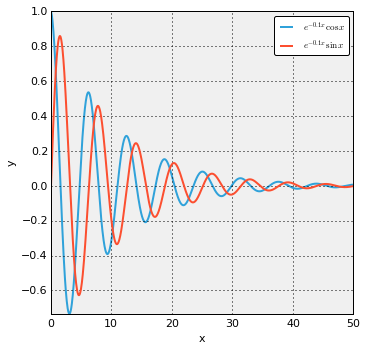

In [25]:
%%output size=150
f_curve * g_curve

## Plotting numpy arrays

In [3]:
x = np.linspace(-10.0, 10.0, 101)
y = np.cos(2*np.pi*x)*np.exp(-0.3*x)

Plotting numpy arrays as a tuple is more intuitive than zipping the arrays.

:Curve   [x]   (y)
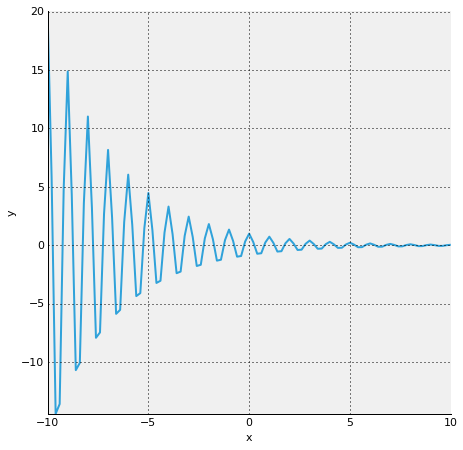

In [5]:
%%output size=200
hv.Curve((x, y))